# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1374 Харитонов Алексей. Вариант №23

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

*Линейная регрессионная модель:*

> $Y = X^T\beta + \varepsilon$ , $\mathbb{E_{\theta}\varepsilon} = 0$ , $Var_{\theta} \varepsilon = \sigma^{2}\mathbb{E}$
    
> $X^T$ - регрессоры (факторы модели)
   
> $\beta$ - параметры регрессии
    
> $\varepsilon$ - случайная ошибка

*МНК:*
    
> $RSS(\beta) = || Y - X^T\beta ||^2 \rightarrow min_{\beta}$

> Нормальные уравнения:
$XX^T\beta = XY$
    
> Решение системы нормальных уравнений в регулярном случае:
$\widehat\beta = (XX^T)^{-1}XY$ , $\beta = (\beta_{0}, \beta_{1})$

> *МНК оценка* $\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1)^\intercal$


*Оценка параметра $\sigma^2:$*
$s^2 \frac{RSS(\widehat\beta)}{n-r}=\frac{SSe}{n-r}$

*Несмещенная оценка дисперсии:*
$s^2 = \frac{RSS(\widehat\beta)}{n-r} = \frac{(Y-X^T\widehat\beta)^T(Y-X^T\widehat\beta)}{n-r}$
    
$r - rankX$

*ДНО-функция:* $\psi = C^\intercal \beta = (\beta_0, \beta_1)^\intercal$


*Доверительный эллипсоид уровня доверия $1 - \alpha$:*

> $A_{\alpha} = \{ \vec{x}: (\vec{x} - \widehat{\Psi})^{T} b_{\Psi}^{-1} (\vec{x} - \widehat{\Psi})  \le qs^{2}x_{\alpha}\}$
$\widehat{\Psi}$ - вектор оценок

> $b_{\Psi}$ - матрица оценок ковариации

> $s^2$ - оценка дисперсии

> $q$ - пороговая точка, связанная с распределением $\mathcal{X}_{n-r}^2$
   
> $x_{\alpha}$ - значение функции распредления $\mathcal{X}_{n-r}^2$ с уровнем доверия $1 - \alpha$

*F - статистика:*  $\mathbb{F} = \frac{{SS_H}}{S^2*rank(X)} $

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f
from scipy.stats import pearsonr

In [94]:
# Входные данные
X = np.array([0, 8, 4, 4, 2, 4, 7, 4, 3, 2, 6, 6, 0, 7, 0, 8, 6, 3, 3, 3, 2, 2, 5, 6, 6,
     8, 3, 2, 3, 0, 8, 4, 1, 7, 8, 6, 2, 6, 3, 6, 3, 0, 8, 6, 3, 2, 6, 5, 5, 7])
print(len(X))
Y = np.array([8.50, 8.56, 9.57, 15.70, 10.60, 3.19, 12.63, 7.09, 10.09, 6.75, 12.26, 11.02, 6.16, 18.61, 1.32, 8.77, 14.14,
     12.57, 2.95, 12.91, 8.74, 11.72, 4.28, 7.11, 13.46, 20.43, 8.86, 12.78, 11.23, 4.70, 2.26, 3.83, 6.42, 4.35,
     13.33, 7.98, 1.95, 1.26, 12.11, 13.40, 6.99, 1.83, 8.19, 6.07, 14.51, 2.60, 1.41, 8.92, 21.97, 7.71])
print(len(Y))

alpha = 0.2
h = 2.4


50
50


### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

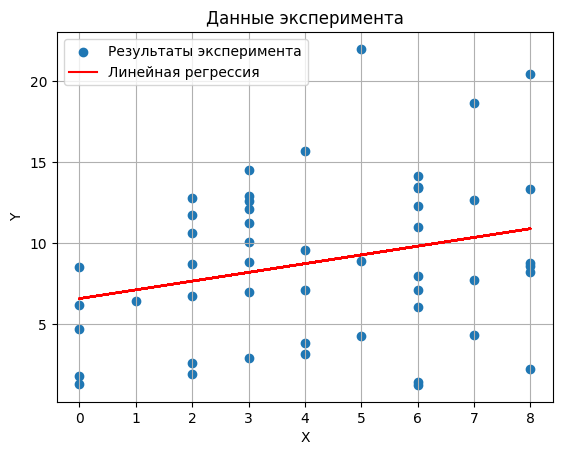

In [95]:
# Результаты эксперимента
plt.scatter(X, Y, label='Результаты эксперимента')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Данные эксперимента')
plt.grid(True)


# Линейная регрессия
coefficients = np.polyfit(X, Y, 1)
regression_line = np.polyval(coefficients, X)

plt.plot(X, regression_line, color='red', label='Линейная регрессия')
plt.legend()
plt.show()

На графике видно, что данная модель не подходит к входным данным.

In [31]:
X_matrix = np.array([[1 for i in range(len(X))], X])
Y_matrix = Y

XXT = np.dot(X_matrix, X_matrix.T)
XXT_inv = np.linalg.inv(XXT)

beta = np.dot(XXT_inv, np.dot(X_matrix, Y_matrix))

print(f'beta_0 = {beta[0]}, beta_1 = {beta[1]}')

beta_0 = 6.581843962099318, beta_1 = 0.5384873328405361


### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

$r = rank(X) = 2$

In [96]:
s = np.dot((Y_matrix - np.dot(X_matrix.T, beta)).T, (Y - np.dot(X_matrix.T, beta))) / (len(X) - 2)
print(f'Оценка дисперсии s^2 = {s}')

Оценка дисперсии s^2 = 23.483228354109258


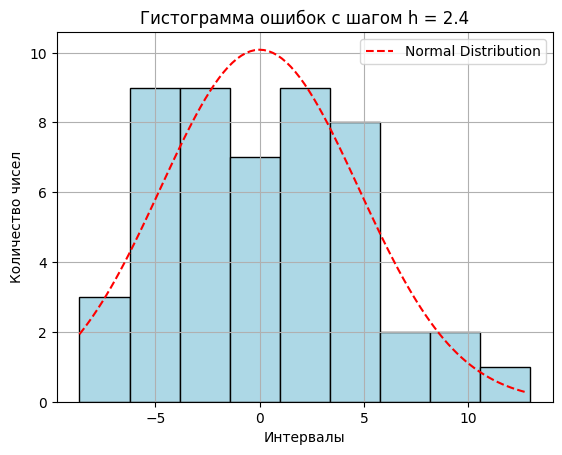

In [110]:
from scipy.stats import norm

X_matrix = np.column_stack([np.ones(len(X)), X])
beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y

errors = Y - np.dot(X_matrix, beta)

plt.title(f'Гистограмма ошибок с шагом h = {h}')
plt.ylabel('Количество чисел')
plt.xlabel('Интервалы')

hist, bins, _ = plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h), edgecolor='black', color='lightblue')

mu, sigma = np.mean(errors), np.std(errors)
x_axis = np.linspace(min(errors), max(errors), 100)
pdf_values = norm.pdf(x_axis, mu, sigma) * len(errors) * h

plt.plot(x_axis, pdf_values, color='red', linestyle='--', label='Нормальное распределение')

plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Проверка количества элементов в интервале
num = 0
for val in errors:
    if 4.8 < val <= max(errors):
        num += 1
print(num)

6


Проверим гипотезу нормальности ошибок на уровне значимости $\alpha = 0.1$ по $\chi^2$ с помощью критерия согласия Пирсона

$H_0: \vec{\varepsilon} \sim \mathcal{N}(0, \sigma^{2})$

Разобъем ошибки на интервалы

$I_1 = (-\infty, -4.8], n_1 = 11$

$I_2 = (-4.8, -2.4], n_2 = 5$

$I_3 = (-2.4, 0], n_3 = 10$

$I_4 = (0, 2.4], n_4 = 7$

$I_5 = (2.4, 4.8], n_5 = 11$

$I_6 = (4.8, +\infty], n_6 = 6$

In [52]:
right_endpoints = [-4.8, -2.4, 0, 2.4, 4.8]
n_i = [11, 5, 10, 7, 11, 6]

p = [0] * (len(right_endpoints) + 1)

p[0] = stats.norm.cdf(right_endpoints[0], 0, s)

for i in range(1, len(right_endpoints)):
    p[i] = stats.norm.cdf(right_endpoints[i], 0, s) - stats.norm.cdf(right_endpoints[i - 1], 0, s)

p[len(right_endpoints)] = 1 - stats.norm.cdf(right_endpoints[-1], 0, s)


X2 = 0

for i in range(len(p)):
    X2 += (n_i[i] - len(X) * p[i])**2 / (len(X) * p[i])


x_a = stats.chi2(6 - 1).ppf(1 - alpha)
print(f'X^2 = {X2}')
print(f'x_a = {x_a}')

print(f'p-value = {1 - stats.chi2.cdf(X2, 5)}')

X^2 = 103.20489712526233
x_a = 7.289276126648961
p-value = 0.0


$\mathcal{\chi^2} > x_\alpha \rightarrow$ отвергаем гипотезу $H_0$

Наибольшие уровень значимости, при котором нет основания отвергнуть гипотезу, близок к 0

*Расстояние полученной оценки до класса нормальных распределений по Колмогорову:*


In [53]:
D, p_value = stats.kstest(errors, 'norm', args=(np.mean(errors), np.sqrt(s)))

print(f'D = {D}')
print(f'p-value={ p_value}')

D = 0.07660018283261205
p-value=0.9091820597019363


$p-value=0.91$ больше уровня значимости $\alpha = 0.1 \Rightarrow $ принимаем гипотезу $H_0$

Визуально можно  отметить, что график широкий и низкий, а его левая и правая части сильно отличаются от центральных. Критерий согласия Пирсона отклонил гипотезу о нормальности распределения ошибок на уровне $\alpha$, а тест Колмогорова принял гипотезу.

### 3. В предположении нормальности ошибок построить доверительный интервал для параметров $\beta_0,\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для ($\beta_0,\beta_1$) (вычислить его полуоси).

Доверительный интервал уровня доверия 1 - $\alpha$

$ \Psi \in \left[ \widehat{\Psi} - x_{\alpha}s\sqrt{b}, \widehat{\Psi} + x_{\alpha}s\sqrt{b} \right]$

где $x_{\alpha}: S_{n-r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

Построим доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия 1 − $\alpha:$

In [56]:
C_0 = np.array([1, 0])
C_1 = np.array([0, 1])

XXT_inv = np.linalg.inv(np.dot(X_matrix, X_matrix.T))

b_0 = np.dot(np.dot(C_0.T, XXT_inv), C_0)
b_1 = np.dot(np.dot(C_1.T, XXT_inv), C_1)

x_alpha = stats.t(len(X) - 2).ppf(1 - alpha / 2)

product_0 = x_alpha * np.sqrt(s) * np.sqrt(b_0)
product_1 = x_alpha * np.sqrt(s) * np.sqrt(b_1)
print(f'Доверительный интервал для beta_0 [{beta[0] - product_0}, {beta[0] + product_0}]')
print(f'Доверительный интервал для beta_1 [{beta[1] - product_1}, {beta[1] + product_1}]')

Доверительный интервал для beta_0 [4.789950346155748, 8.373737578042887]
Доверительный интервал для beta_1 [0.1734782253057044, 0.9034964403753678]


Построим доверительный эллипс уровня доверия 1 − $\alpha$ для $(\beta_0, \beta_1)$ и вычислим его полуоси

$A_{\alpha} = \{ \vec{x}: (\vec{x} - \widehat{\Psi})^{T} b_{\Psi}^{-1} (\vec{x} - \widehat{\Psi})  \le qs^{2}x_{\alpha}\}$

где $x_{\alpha}: F_{q, n - r} (x_{\alpha}) = 1 - \alpha$

$C = \begin{pmatrix}
    1 & 0\\
    0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
    x\\
    y
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.

Тогда уравнение доверительного эллипсоида:

$(\widehat \psi -  \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 \le qs^2x_\alpha$

$\frac{\lambda_1}{qs^2x_\alpha}x^2 + \frac{\lambda_2}{qs^2x_\alpha}y^2 \le 1$, где $\lambda_1$ и $\lambda_2$ - собственные числа матрицы $XX^T$

Cобственные числа, собственные векторы и полуоси эллипса:

In [65]:
eigenvalues, eigenvectors = np.linalg.eig(XXT)
q = 2
print("Собственные числа: ", *eigenvalues)
print("Собственные векторы: ", *eigenvectors)
print("beta: ", *beta)

x_alpha = stats.f(2, len(X) - 2).ppf(1 - alpha)

a = np.sqrt((q * s * x_alpha) / eigenvalues[0])
b = np.sqrt((q * s * x_alpha) / eigenvalues[1])

print(f'Большая полуось: {a}')
print(f'Малая полуось: {b}')

Собственные числа:  11.97156848769373 1243.0284315123063
Собственные векторы:  [-0.9844334  -0.17575802] [ 0.17575802 -0.9844334 ]
beta:  6.581843962099318 0.5384873328405361
Большая полуось: 2.5555072022617793
Малая полуось: 0.2507910913531829


$
\begin{pmatrix} x\\ y \end{pmatrix} = \begin{pmatrix} -0.9844334  && -0.17575802 \\ 0.17575802 && -0.9844334 \end{pmatrix} \cdot \begin{pmatrix} 6.581843962099318 - \beta_0 \\  0.5384873328405361 - \beta_1 \end{pmatrix} = \begin{pmatrix} -6.57403 + 0.984433\beta_0 + 0.175758\beta_1 \\ 0.626707 - 0.175758\beta_0 + 0.984433\beta_1 \end{pmatrix}
$

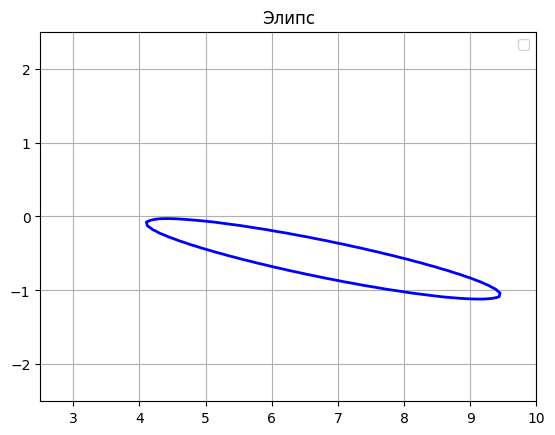

In [76]:
def ellipse_equation(beta_0, beta_1):
    return ((-6.57403 + 0.984433 * beta_0 + 0.175758 * beta_1)**2 / a**2) + ((0.626707 - 0.175758 * beta_0 - 0.984433 * beta_1)**2 / b**2)


x = np.linspace(2.5, 10, 100)
y = np.linspace(-2.5, 2.5, 100)
beta_0_grid, beta_1_grid = np.meshgrid(x, y)

ellipse_values = ellipse_equation(beta_0_grid, beta_1_grid)

plt.contour(beta_0_grid, beta_1_grid, ellipse_values, levels=[1], colors='blue', linewidths=2)
plt.title('Элипс')
plt.legend()
plt.grid(True)
plt.show()

### 4. Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости.

In [103]:
def simple_linear_regression(X, Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    beta_1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean) ** 2)
    beta_0 = Y_mean - beta_1 * X_mean

    # Ковариация и дисперсия
    covariance = np.sum((X - X_mean) * (Y - Y_mean))
    std_dev_X, std_dev_Y = np.sqrt(np.sum((X - X_mean) ** 2)), np.sqrt(np.sum((Y - Y_mean) ** 2))

    # Коэффициент корреляции Пирсона
    correlation_coefficient = covariance / (std_dev_X * std_dev_Y)

    return beta_0, beta_1, correlation_coefficient

def f_test(X, Y, beta_0, beta_1):
    n, p = len(X), 2  # Количество параметров и наблюдений

    SSE = np.sum((Y - (beta_0 + beta_1 * X)) ** 2)
    SSR = np.sum((beta_0 + beta_1 * X - np.mean(Y)) ** 2)
    SST = SSE + SSR

    MSE, MSR = SSE / (n - p), SSR / p # СКО остатков и объясненных отклонений

    F = MSR / MSE

    F_critical = f.ppf(1 - alpha, p, n - p)

    return F, F_critical

def hypothesis_result(F, F_critical):
    if F > F_critical:
        return "Отвергаем нулевую гипотезу"
    else:
        return "Не отвергаем нулевую гипотезу"


beta_0, beta_1, correlation_coefficient = simple_linear_regression(X, Y)

# F-тест
F, F_critical = f_test(X, Y, beta_0, beta_1)
print("Коэффициент корреляции Пирсона:", correlation_coefficient)
print("F-статистика:", F)
print("Кртическое значение F:", F_critical)
print(hypothesis_result(F, F_critical))


Коэффициент корреляции Пирсона: 0.26667817681483197
F-статистика: 1.837491330012419
Кртическое значение F: 1.6646290755148478
Отвергаем нулевую гипотезу


### 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

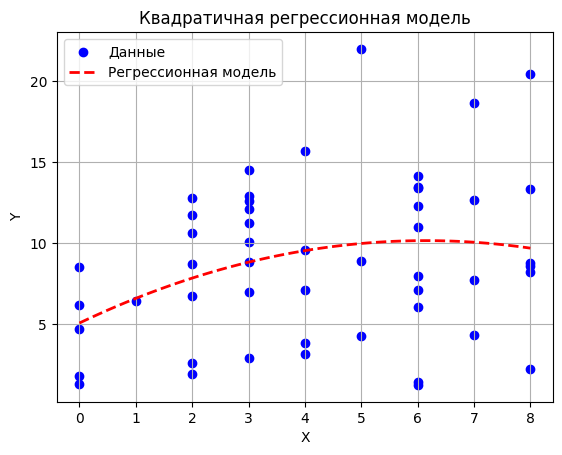

In [106]:
def estimate_quadratic_regression(X, Y):
    # Матрица признаков с X и X^2
    X_squared = X ** 2
    X_extended = np.column_stack((X, X_squared))

    X_extended = np.column_stack([np.ones(len(X)), X_extended])

    # МНК-оценка
    beta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ Y

    beta_0, beta_1, beta_2 = beta[0], beta[1], beta[2]

    return beta_0, beta_1, beta_2

def visualize_quadratic_regression(X, Y, beta_0, beta_1, beta_2):
    # Регрессионная модель
    X_plot = np.linspace(min(X), max(X), 100)
    Y_pred = beta_0 + beta_1 * X_plot + beta_2 * X_plot ** 2

    plt.scatter(X, Y, label='Данные', color='blue', marker='o')
    plt.plot(X_plot, Y_pred, color='red', linestyle='--', linewidth=2, label='Регрессионная модель')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Квадратичная регрессионная модель')
    plt.legend()
    plt.grid(True)
    plt.show()

# Линейная квадратичная регрессия
beta_0, beta_1, beta_2 = estimate_quadratic_regression(X, Y)

visualize_quadratic_regression(X, Y, beta_0, beta_1, beta_2)


### 6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Несмещенная оценка дисперсии

$s^2 = \frac{RSS(\widehat\beta)}{n-r} = \frac{(Y-X^T\widehat\beta)^T(Y-X^T\widehat\beta)}{n-r}$

$r = rank X = 3$

In [115]:
s = np.dot((Y_matrix - np.dot(X_matrix.T, beta)).T, (Y - np.dot(X_matrix.T, beta))) / (len(X) - 3)
print(f'Оценка дисперсии s^2 = {s}')

ValueError: ignored

Несмещённая оценка дисперсии: 24.765212612244902


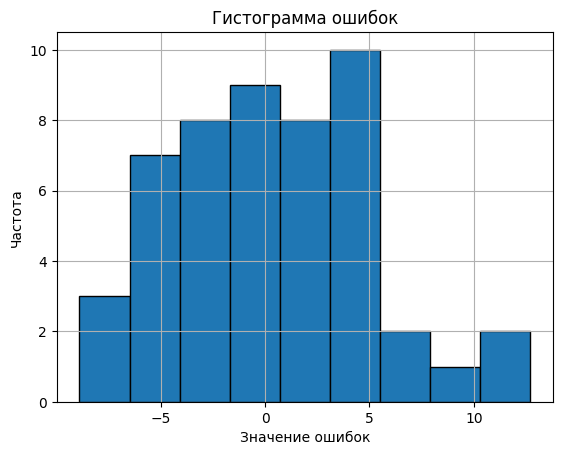

Статистика критерия Хи-квадрат: 0.6157305884095974
p-value критерия Хи-квадрат: 0.7350143220294447
Нет оснований отвергать гипотезу о нормальности ошибок
Статистика Колмогорова-Смирнова: 0.3625161405775944
p-value Колмогорова-Смирнова: 2.149809154386084e-06
Распределение ошибок значимо отличается от нормального


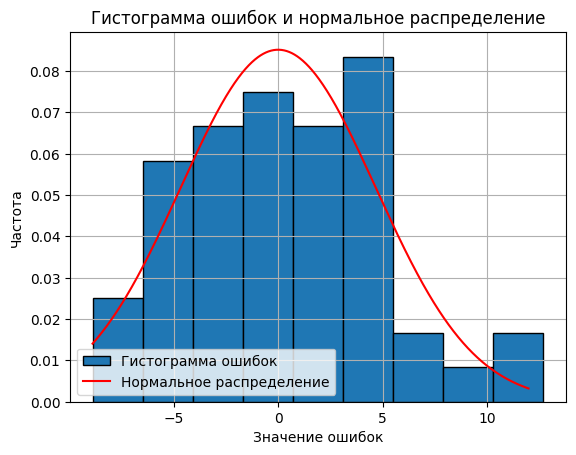

In [130]:
from scipy import stats

# Вычисление остатков регрессии (ошибок)
linregress = beta_0 + beta_1 * X + beta_2 * X ** 2
residuals = Y - linregress

# Несмещённая оценка дисперсии
n = len(Y)
Y_mean = np.mean(Y)
unbiased_variance = np.sum((Y - Y_mean)**2) / (n - 1)

print(f"Несмещённая оценка дисперсии: {unbiased_variance}")

# Построение гистограммы ошибок с заданным шагом h
plt.hist(residuals, bins=np.arange(min(residuals), max(residuals) + h, h), edgecolor='black')
plt.xlabel('Значение ошибок')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок')
plt.grid(True)
plt.show()

# Проверка гипотезы нормальности с помощью критерия Хи-квадрат
chi2_statistic, p_value_chi2 = stats.normaltest(residuals)
alpha_chi2 = 0.05

print(f"Статистика критерия Хи-квадрат: {chi2_statistic}")
print(f"p-value критерия Хи-квадрат: {p_value_chi2}")

if p_value_chi2 < alpha_chi2:
    print("Отвергаем гипотезу о нормальности ошибок")
else:
    print("Нет оснований отвергать гипотезу о нормальности ошибок")

# Оценка расстояния от полученной оценки до класса нормальных распределений по Колмогорову
ks_statistic, p_value_ks = stats.kstest(residuals, 'norm')
alpha_ks = 0.05

print(f"Статистика Колмогорова-Смирнова: {ks_statistic}")
print(f"p-value Колмогорова-Смирнова: {p_value_ks}")

if p_value_ks < alpha_ks:
    print("Распределение ошибок значимо отличается от нормального")
else:
    print("Распределение ошибок не значимо отличается от нормального")

# Визуальное оценивание
plt.hist(residuals, bins=np.arange(min(residuals), max(residuals) + h, h), edgecolor='black', density=True, label='Гистограмма ошибок')
x = np.linspace(min(residuals), max(residuals), 1000)
plt.plot(x, stats.norm.pdf(x, np.mean(residuals), np.std(residuals)), 'r', label='Нормальное распределение')
plt.xlabel('Значение ошибок')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок и нормальное распределение')
plt.legend()
plt.grid(True)
plt.show()

### 7.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0,\beta_1,\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

In [132]:
# Вычисление стандартной ошибки
X_squared = X ** 2
X_extended = np.column_stack((X, X_squared))
unbiased_variance = np.sum((Y - Y_mean)**2) / (n - 1)
cov_matrix = unbiased_variance * np.linalg.inv(X_extended.T.dot(X_extended))
se_beta_0 = np.sqrt(cov_matrix[0, 0])
se_beta_1 = np.sqrt(cov_matrix[1, 1])
se_beta_2 = np.sqrt(cov_matrix[2, 2])

# Вычисление критического значения для уровня доверия (1 - alpha)
from scipy.stats import norm

critical_value = norm.ppf(1 - alpha / 2)  # Для двустороннего доверительного интервала

# Доверительные интервалы для параметров beta_0, beta_1, beta_2
confidence_interval_beta_0 = (beta_0 - critical_value * se_beta_0, beta_0 + critical_value * se_beta_0)
confidence_interval_beta_1 = (beta_1 - critical_value * se_beta_1, beta_1 + critical_value * se_beta_1)
confidence_interval_beta_2 = (beta_2 - critical_value * se_beta_2, beta_2 + critical_value * se_beta_2)

print(f"Доверительный интервал для beta_0: {confidence_interval_beta_0}")
print(f"Доверительный интервал для beta_1: {confidence_interval_beta_1}")
print(f"Доверительный интервал для beta_2: {confidence_interval_beta_2}")


alpha_level = 1 - alpha
df1 = 3  # Число параметров
df2 = len(Y) - df1 - 1  # Число степеней свободы
f_critical = f.ppf(alpha_level, df1, df2)

ellipsoid_equation = f_critical * np.sqrt(np.diag(cov_matrix))
print(f"Уравнение доверительного эллипсоида: (({beta[1]} - x1) / {ellipsoid_equation[1]})**2 + (({beta[2]} - x2) / {ellipsoid_equation[2]})**2 <= 1")

IndexError: ignored

### 8.Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.


In [121]:
# Сумма квадратов остатков
SSR = np.sum((beta_0 + beta_1 * X + beta_2 * X ** 2 - np.mean(Y)) ** 2)
# Сумму квадратов отклонений
SSE = np.sum((Y - (beta_0 + beta_1 * X + beta_2 * X ** 2)) ** 2)
p = 3

n = len(X)
SST = SSE + SSR
MSE = SSE / (n - p)  # СКО остатков
MSR = SSR / p  # СКО отклонений
F = MSR / MSE  # Значение F-критерия

alpha = 0.2

F_critical = f.ppf(1 - alpha, p, n - p)  # Критическое значение F-критерия

print("F =",F)
print("Критическое значение =", F_critical)

if F_critical < alpha:
    print(f"Гипотеза линейной регрессионной зависимости переменной Y от переменной X значима на уровне {alpha}")
else:
    print(f"Гипотеза линейной регрессионной зависимости переменной Y от переменной X не значима на уровне {alpha}")

F = 1.6641310445463504
Критическое значение = 1.6085202639061869
Гипотеза линейной регрессионной зависимости переменной Y от переменной X не значима на уровне 0.2.


## Выводы

В ходе работы были освоены основные положения метода наименьших квадратов (МНК), статистические свойства МНК-оценок, понятия функции регрессии и роли МНК в регрессионном анализе. Также был проведен регрессионный анализ, построены линейные модели, произведена оценка параметров и исследование их значимости, проверены гипотезы о независимости и линейной регрессионной зависимости, построены оценки нормальности ошибок, доверительные интервалы и доверительный эллипс и эллипсоид.
